Team Members: Fabian Hitzenberger - Shah Mustari 


Einleitung


Unser Mini-Projekt basiert auf einem öffentlich zugänglichen Datensatz über Vornamen in Österreich. Ziel ist es, die Daten zu analysieren, Bereinigungen durchzuführen und interessante Einblicke durch Visualisierungen zu gewinnen.

Dataset: Vorname


Dataset Link: https://data.statistik.gv.at/web/meta.jsp?dataset=OGDEXT_VORNAMEN_1

First of all muss man die Bibliothek Pandas runter laden um mit den Funktionen die durch diese Library zur verfügung gestellet werden arbeiten zu können. 

In [45]:
import pandas as pd

In diesem Schritt wird festgelegt an welchem ort sich die csv dateien befinden aus welchen wir unsere informationen entnehmen

In [46]:
path_Vornamen = 'MiniProjektCSV/OGDEXT_VORNAMEN_1.csv'
path_Geschlecht = 'MiniProjektCSV/OGDEXT_VORNAMEN_1_C-GESCHLECHT-0.csv'
path_Wohnbezirk = 'MiniProjektCSV/OGDEXT_VORNAMEN_1_C-WOHNBEZIRK-0.csv'
path_Header = 'MiniProjektCSV/OGDEXT_VORNAMEN_1_HEADER.csv'

In dem Codeabschnitt drunter werden die csv dateien, dessen Pfad wir im vorherigen Codeabschnitt definiert haben ausgelesen. Hierführ wurde eine Funktion mit dem namen load_data geschrieben. dieser Funktion wird über einen Pfad mitgeteilt wo sich die csv datei befindet, welche ausgelesen werden soll. Rückgabewert der Funktion ist die ausgelesenen csv datei. In der Funktion wird vor dem auslesen überprüft ob der Pfad auch valide ist, damit das Programm nicht vorzeitig durch einen Error beendet wird. 

In [47]:
import os
def load_data(path, sep=';'):
    if os.path.exists(path):
        return pd.read_csv(path, sep=sep)
    else:
        print(f'Die Datei {path} wurde nicht gefunden.')
        return None

# Daten laden
data_geschlecht = load_data(path_Geschlecht)
data_wohnbezirk = load_data(path_Wohnbezirk)
data_vornamen = load_data(path_Vornamen)

Im folgenden Schritt wird das zurvor ausgelesen csv namens data_vornamen in ein dataframe verwandeln und ausgeben, um zu überprüfen das dies auch wie gewünscht funktioniert hat. 

In [48]:
df_vornamen = pd.DataFrame(data_vornamen)

df_vornamen

,C-JAHR-0,C-WOHNBEZIRK-0,C-GESCHLECHT-0,F-VORNAME_NORMALISIERT,F-ANZAHL_LGEB
0,1984,101,1,Andreas,4
1,1984,101,1,Bernd,1
2,1984,101,1,Christian,2
3,1984,101,1,Christoph,2
4,1984,101,1,Clemens,1
...,...,...,...,...,...
1048570,2018,107,2,Gloria,1
1048571,2018,107,2,Greta,2
1048572,2018,107,2,Hannah,4
1048573,2018,107,2,Hatice,1


Da wir in unserem Mini Projekt mit mehreren csv dateien arbeiten müssen, müssen wir diese miteinander verbinden um diese am Ende gut visualisieren zu könnnen. Die csv dateien data_vorname und data_geschlecht werden in diesem Schritt mit der methode .merge() miteinander gemerged, in der methode wird auserdem mit left_on welche spalte in der tabelle data_vorname und mit right_on welche spalte in der tabelle data_geschlecht übereinstimmen. mit how wird noch angegeben welche art von join verwendet werden soll, in diesem fall verwenden wir ein inner join. Um zu überprüfen das dass wieder wie gewünscht ausgeführt wurde wird das dataframe wieder ausgegeben.

In [49]:
merged_df = pd.merge(data_vornamen, data_geschlecht, left_on='C-GESCHLECHT-0', right_on='code', how='inner')

df = pd.merge(merged_df, data_wohnbezirk, left_on='C-WOHNBEZIRK-0', right_on='code', how='inner')

In [50]:
df

,C-JAHR-0,C-WOHNBEZIRK-0,C-GESCHLECHT-0,F-VORNAME_NORMALISIERT,F-ANZAHL_LGEB,code_x,name_x,Unnamed: 2_x,en_name_x,code_y,name_y,Unnamed: 2_y,en_name_y
0,1984,101,1,Andreas,4,1,männlich,NaN,male,101,Eisenstadt (Stadt) <101>,NaN,NaN
1,1984,101,1,Bernd,1,1,männlich,NaN,male,101,Eisenstadt (Stadt) <101>,NaN,NaN
2,1984,101,1,Christian,2,1,männlich,NaN,male,101,Eisenstadt (Stadt) <101>,NaN,NaN
3,1984,101,1,Christoph,2,1,männlich,NaN,male,101,Eisenstadt (Stadt) <101>,NaN,NaN
4,1984,101,1,Clemens,1,1,männlich,NaN,male,101,Eisenstadt (Stadt) <101>,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2017,923,2,Zarah,1,2,weiblich,NaN,female,923,Wien 23. Liesing <923>,NaN,NaN
1048571,2017,923,2,Zejneb,1,2,weiblich,NaN,female,923,Wien 23. Liesing <923>,NaN,NaN
1048572,2017,923,2,Zoe,3,2,weiblich,NaN,female,923,Wien 23. Liesing <923>,NaN,NaN
1048573,2017,923,2,Zofia,1,2,weiblich,NaN,female,923,Wien 23. Liesing <923>,NaN,NaN


durch das mergen befinden sich nun spalten in unserem dataframe die nicht mehr benätigt werden. Für diesen Fall haben wir die methode drop verwendet, dieser Methode haben wir ein array mit den namen der Spalten übergeben die aus dem dataframe gelöscht werden sollen. 

In [51]:
df = df.drop(['C-GESCHLECHT-0', 'code_x', 'Unnamed: 2_x', 'C-WOHNBEZIRK-0', 'Unnamed: 2_y', 'en_name_y', 'en_name_x', 'code_y'], axis=1)

In [52]:
df

,C-JAHR-0,F-VORNAME_NORMALISIERT,F-ANZAHL_LGEB,name_x,name_y
0,1984,Andreas,4,männlich,Eisenstadt (Stadt) <101>
1,1984,Bernd,1,männlich,Eisenstadt (Stadt) <101>
2,1984,Christian,2,männlich,Eisenstadt (Stadt) <101>
3,1984,Christoph,2,männlich,Eisenstadt (Stadt) <101>
4,1984,Clemens,1,männlich,Eisenstadt (Stadt) <101>
...,...,...,...,...,...
1048570,2017,Zarah,1,weiblich,Wien 23. Liesing <923>
1048571,2017,Zejneb,1,weiblich,Wien 23. Liesing <923>
1048572,2017,Zoe,3,weiblich,Wien 23. Liesing <923>
1048573,2017,Zofia,1,weiblich,Wien 23. Liesing <923>


Um das dataframe einfacher verständlich und für die weitere verwendung zu vereinfachen wird im folgenden schritt die namen der einzelnen spalten umbenannt. Hierführ wird ein Array definiert welches folgendermaßen aussieht: 'alter Name': 'neuer name'. dieses array wird dann mit der funktion rename auf unser dataframe angewendet

In [53]:
neue_namen = {'C-JAHR-0': 'Geburtsjahr', 'F-VORNAME_NORMALISIERT': 'Vorname', 'F-ANZAHL_LGEB': 'Anz_LBGEB', 'name_x': 'Geschlecht', 'name_y': 'Bezirk'}

In [54]:
df = df.rename(columns=neue_namen)

In [55]:
df

,Geburtsjahr,Vorname,Anz_LBGEB,Geschlecht,Bezirk
0,1984,Andreas,4,männlich,Eisenstadt (Stadt) <101>
1,1984,Bernd,1,männlich,Eisenstadt (Stadt) <101>
2,1984,Christian,2,männlich,Eisenstadt (Stadt) <101>
3,1984,Christoph,2,männlich,Eisenstadt (Stadt) <101>
4,1984,Clemens,1,männlich,Eisenstadt (Stadt) <101>
...,...,...,...,...,...
1048570,2017,Zarah,1,weiblich,Wien 23. Liesing <923>
1048571,2017,Zejneb,1,weiblich,Wien 23. Liesing <923>
1048572,2017,Zoe,3,weiblich,Wien 23. Liesing <923>
1048573,2017,Zofia,1,weiblich,Wien 23. Liesing <923>


Bei den Wohnbezirken steht immer der Code dabei, wie Beispielsweise bei Eisenstadt (Stadt) mit '<101>' dieser Code wird nicht benötigt, was uns dazu veranlasst diese Codes aus den namen zu entfernen um diese Werte besser Lesbar zu machen. Wir verwenden für diesen Datenbereinigungsschritt die replace methode hierfür wird angeben das die werte '<\d+>' mit einem leerstring ersetzt werden sollen. 

In [56]:
df['Bezirk'] = df['Bezirk'].str.replace(r'<\d+>$', '', regex=True)
df

,Geburtsjahr,Vorname,Anz_LBGEB,Geschlecht,Bezirk
0,1984,Andreas,4,männlich,Eisenstadt (Stadt)
1,1984,Bernd,1,männlich,Eisenstadt (Stadt)
2,1984,Christian,2,männlich,Eisenstadt (Stadt)
3,1984,Christoph,2,männlich,Eisenstadt (Stadt)
4,1984,Clemens,1,männlich,Eisenstadt (Stadt)
...,...,...,...,...,...
1048570,2017,Zarah,1,weiblich,Wien 23. Liesing
1048571,2017,Zejneb,1,weiblich,Wien 23. Liesing
1048572,2017,Zoe,3,weiblich,Wien 23. Liesing
1048573,2017,Zofia,1,weiblich,Wien 23. Liesing


Das aktuelle dataframe, welches aus den verschiedenen csv dateien gemerged wurde und in welchem die überschriften umbenannt und die werte bereinigt wurden wird als korr.csv nun abgespeichert. 

In [57]:
df.to_csv('korr.csv', index=False, sep=';')


In dem nächsten schritt führen wir die methoden info und describe aus, diese methoden geben uns informationen über unser dataframe.

In [58]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048575 entries, 0 to 1048574
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   Geburtsjahr  1048575 non-null  int64 
 1   Vorname      1048575 non-null  object
 2   Anz_LBGEB    1048575 non-null  int64 
 3   Geschlecht   1048575 non-null  object
 4   Bezirk       1048575 non-null  object
dtypes: int64(2), object(3)
memory usage: 48.0+ MB


,Geburtsjahr,Anz_LBGEB
count,1.048575e+06,1.048575e+06
mean,2.002450e+03,2.457388e+00
std,9.911590e+00,3.195575e+00
min,1.984000e+03,1.000000e+00
25%,1.994000e+03,1.000000e+00
50%,2.004000e+03,1.000000e+00
75%,2.011000e+03,2.000000e+00
max,2.018000e+03,7.600000e+01


Als nächstes werden die numerische spalten herausgefilter und in eine neue csv mit dem namen num.csv gespeichert. Es wird auserdem der sperator mit semikolon festgelegt, dieser seperator ist notwendig damit die spalten in der csv ebenfalls getrennt bleiben. 

In [59]:
numerical_data = df.select_dtypes(include=['int', 'float'])

numerical_data.to_csv("num.csv", index=False, sep=';')


Jetzt werden die nominale werte herausgefiltert und ebenfalls in eine neue csv datei mit dem namen nom.csv abgespeichert, auch hier verwenden wir für die notwendige trennung in der csv datei den seperator semikolon.

In [60]:
nominal_data = df.select_dtypes(include='object')

nominal_data.to_csv("nom.csv", index=False, sep=';')

Im folgenden schritt wird erstmal der standardscaler von sklearn.preprocessing importiert um diesen bei der normalisierung von numerischen werten zu verwenden. Der erste Schritt nach dem Importen ist die numerischen daten festzulegen hierfür wird die methode select_dtypes verwendet und es wird angegeben das wir die spalten die integer und floats sind haben wollen. Danach wird ein StandardScaler mit dem namen *scaler definiert. Um nun die normalisierten werte zu bekommen wird die Methde *fit_transform verwendet auf die numerical_data.

*Der StandardScaler ist eine Klasse aus dem Modul sklearn.preprocessing in scikit-learn. Er wird verwendet, um numerische Daten zu normalisieren, indem er sie auf eine z-Standardnormalverteilung skaliert. Dies bedeutet, dass die Daten so transformiert werden, dass der Mittelwert 0 ist und die Standardabweichung 1 ist. Dies ist besonders nützlich, wenn Sie mit Algorithmen arbeiten, die empfindlich auf unterschiedliche Skalierungen der Merkmale reagieren, wie z. B. Support Vector Machines oder k-nearest neighbors.

*Der fit_transform-Schritt wird verwendet, um den Standard Scaler an die Daten anzupassen und gleichzeitig die Transformation durchzuführen. Die normalisierten Daten werden dann in einem neuen DataFrame (normalized_data) gespeichert und in einer CSV-Datei ('norm1_numeric.csv') exportiert.

In [61]:
from sklearn.preprocessing import StandardScaler

numerical_data = df.select_dtypes(include=['int', 'float'])

scaler = StandardScaler()
normalized_data = pd.DataFrame(scaler.fit_transform(numerical_data), columns=numerical_data.columns)

normalized_data.to_csv("norm1_numeric.csv", index=False, sep=';')


laut internet wird für nominale werte in der regel keine Z-Transformation angewendet deswegen wird in dem hier untenstehenden code auch nur auf die numerischne werte angewendet jedoch werden die nominalen werte ebenfalls in das dataframe geschrieben und darauffolgend in die csv gespeichert 


In [82]:
from sklearn.compose import ColumnTransformer

numerical_columns = df.select_dtypes(include=['int', 'float']).columns
nominal_columns = df.select_dtypes(include='object').columns

# ColumnTransformer, um unterschiedliche Transformationen auf verschiedene Spaltentypen anzuwenden
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('nom', 'passthrough', nominal_columns)  # 'passthrough' bedeutet, dass nominale Werte unverändert bleiben
    ])

# ColumnTransformer auf DataFrame anwenden 
data_normalized = pd.DataFrame(preprocessor.fit_transform(df), columns=numerical_columns.tolist() + nominal_columns.tolist())

# normalisierten Daten in CSV gespeichert
data_normalized.to_csv("norm.csv", index=False, sep=';')


Die Library Seaborn wird als sns importiert und die Library matplotlib.pyplot wird als plt importiert. Diese 2 Librarys werden in den folgenden Visualisierungsschritten intensiv verwendet

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

Der Seaborn style wird auf whitegrid festgelegt

In [64]:
sns.set(style="whitegrid")


In unserer ersten Visualisierung wird die Anzahl der 2 Geschlechter in einem histogram angezeigt. Man sieht auf den ersten Blick sofort das es ca. 100 000 mehr weibliche Datensätze gibt als männliche.

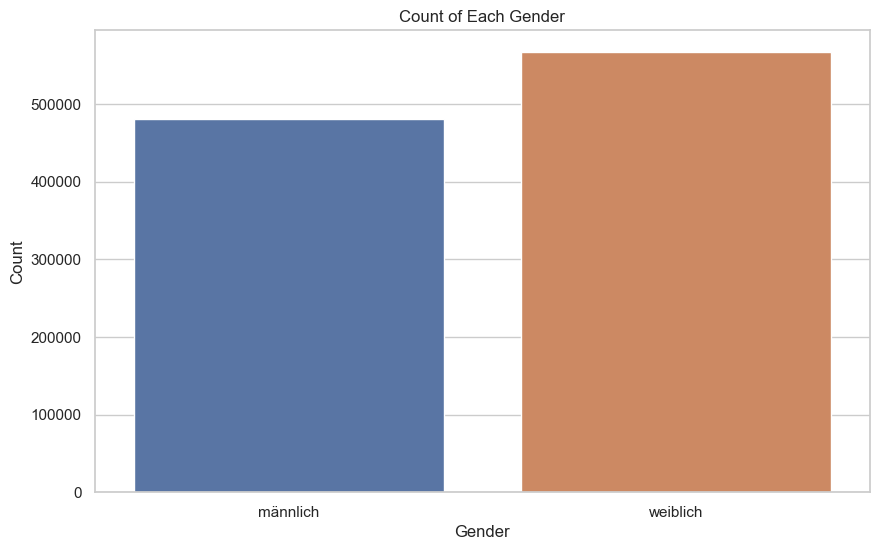

In [65]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Geschlecht', data=df)
plt.title('Count of Each Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In unseren 2. Visualisierung wird die Anzahl der Geburten pro Jahr festgestellt. Wenn man dieses Diagram mal betrachtet kann man feststellen das die geburten durchschnittlich immer weiter nach oben gehen bis auf das letzte Jahr da gibt es einen dramatischen Abfall, dieser Abfall könnte darauf zurück zu führen sein das die daten nicht für das komplette letzte aufzeichnungsjahr erhoben wurde.

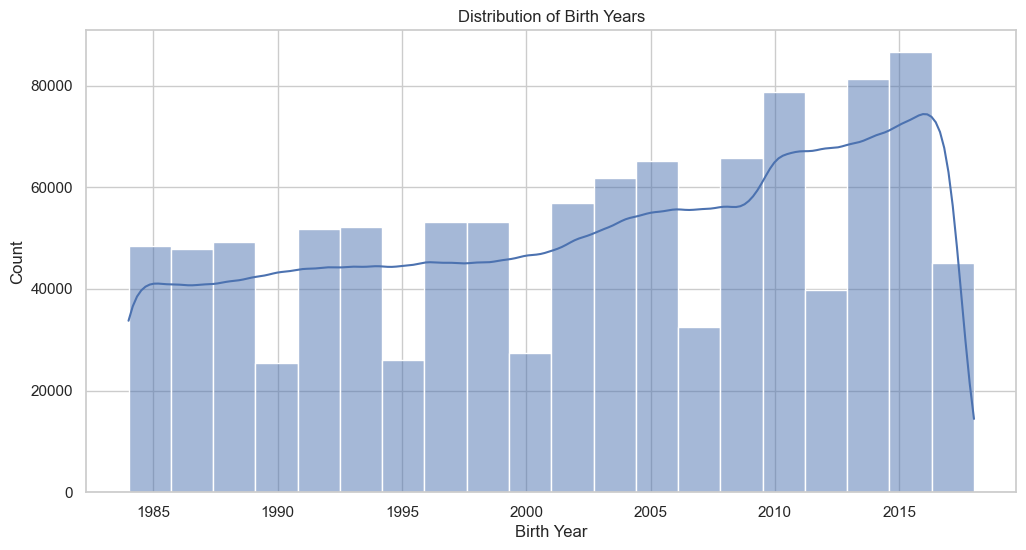

In [66]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Geburtsjahr'], bins=20, kde=True)
plt.title('Distribution of Birth Years')
plt.xlabel('Birth Year')
plt.ylabel('Count')
plt.show()

In unserer 3. Visualisierung sieht man die Top 10 Namen (von beiden geschlechtern, die einzelnen Geschlechter werden in 2 späteren Visualisierungen behandelt). Bei betrachtung dieses Bar Diagrams sieht man ganz oben den namen Alexander dann gibt es einen kleinen einbruch zum 2. Platz der 2.-4. Platz sind alle sehr dicht aneinander und vom 4. auf den 5. Platz sieht man dann wieder einen kleineren Einbruch.

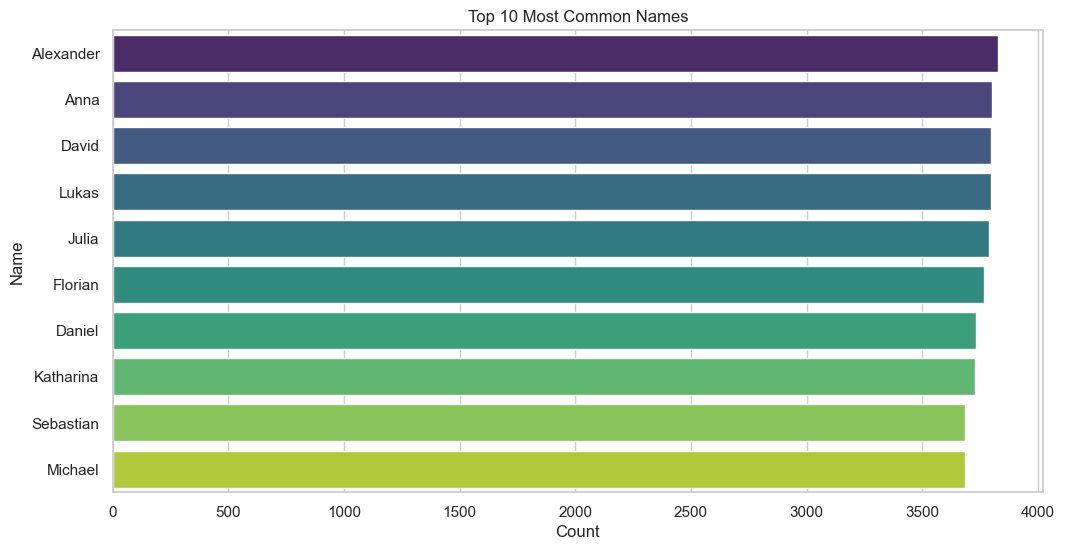

In [67]:
plt.figure(figsize=(12, 6))
top_names = df['Vorname'].value_counts().nlargest(10)
sns.barplot(x=top_names.values, y=top_names.index, palette='viridis')
plt.title('Top 10 Most Common Names')
plt.xlabel('Count')
plt.ylabel('Name')
plt.show()

In unserer 4. Visualisierung sieht man 2 Boxplots, Aufgeteilt auf weibliche und männliche Datensätze. Was bei dem ersten Blick sofort auffällt ist, dass das erste Quartil bei den männlichen Datensätzen das größte ist. Bei den weiblichen Datensätzen sind die Anzahl der Datensätze ziemlich gleichmäßig auf die verschiedenen Quartile aufgeteilt.

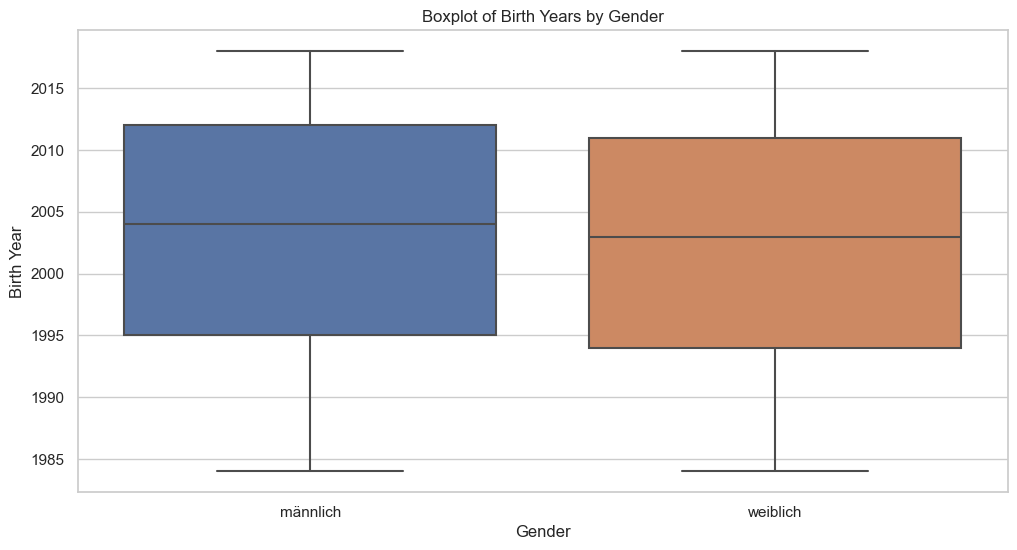

In [68]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Geschlecht', y='Geburtsjahr', data=df)
plt.title('Boxplot of Birth Years by Gender')
plt.xlabel('Gender')
plt.ylabel('Birth Year')
plt.show()

In der 5. Visualisierung sieht man die Anzahl der Geburten pro Bezirk. Angeführt wird diese Tabelle von Graz (Stadt) und abgeschlossen wird mit Rust(Stadt). In dieser Visualisierung ist die KLuft zwischen dem Bezirk mit den meisten Geburten und dem Bezirk mit den wenigsten Geburten bemerkenswert groß.

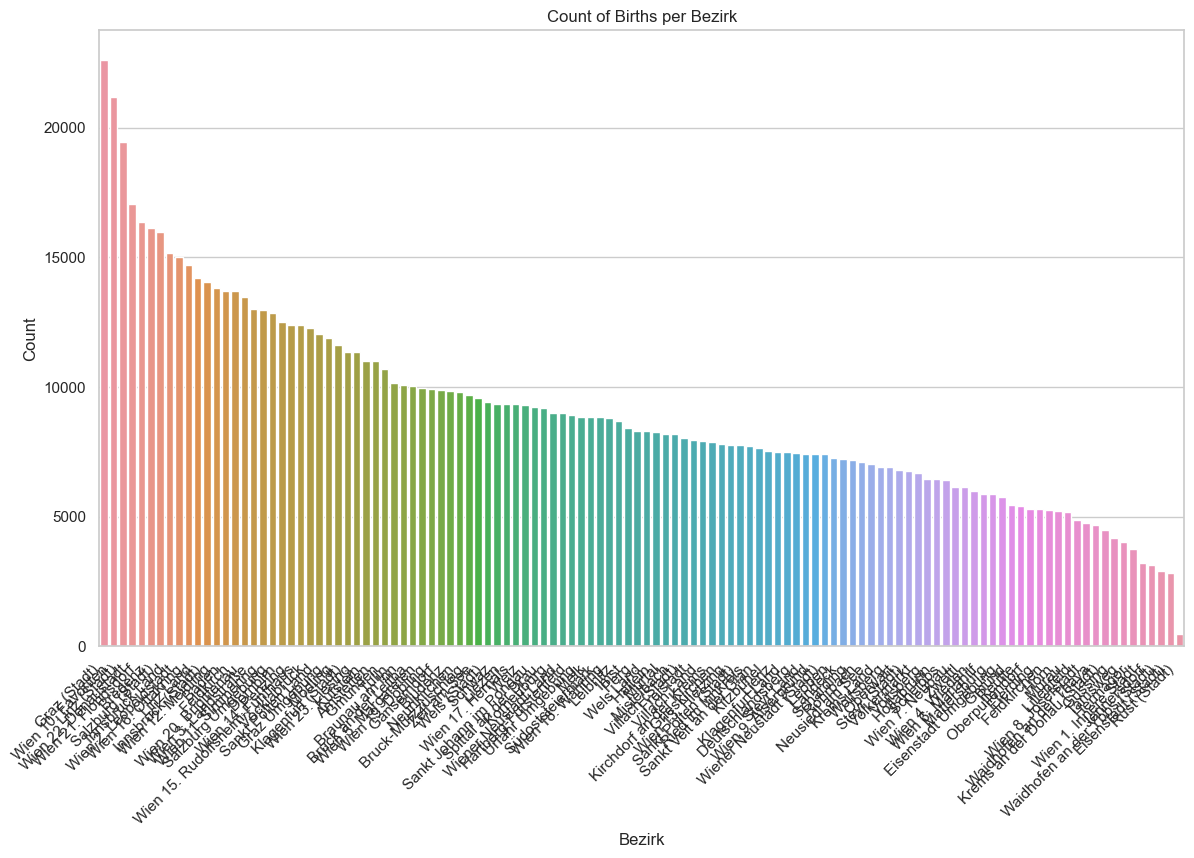

In [69]:
plt.figure(figsize=(14, 8))
sns.countplot(x='Bezirk', data=df, order=df['Bezirk'].value_counts().index)
plt.title('Count of Births per Bezirk')
plt.xlabel('Bezirk')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

Im folgenden sehen wir unsere 6. Visualisierung hierbei handelt es sich um einen Pairplot der Numerischen Columns

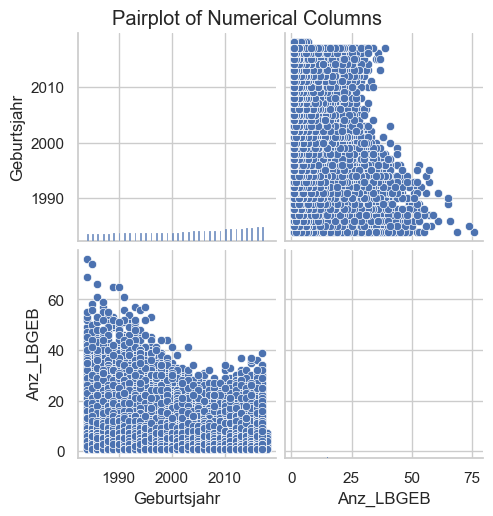

In [70]:
numerical_columns = ['Geburtsjahr', 'Anz_LBGEB']
sns.pairplot(df[numerical_columns])
plt.suptitle('Pairplot of Numerical Columns', y=1.02)
plt.show()

Unsere 7. Visualisierung ist eine Korrelations Heatmap der numerischen Columns.

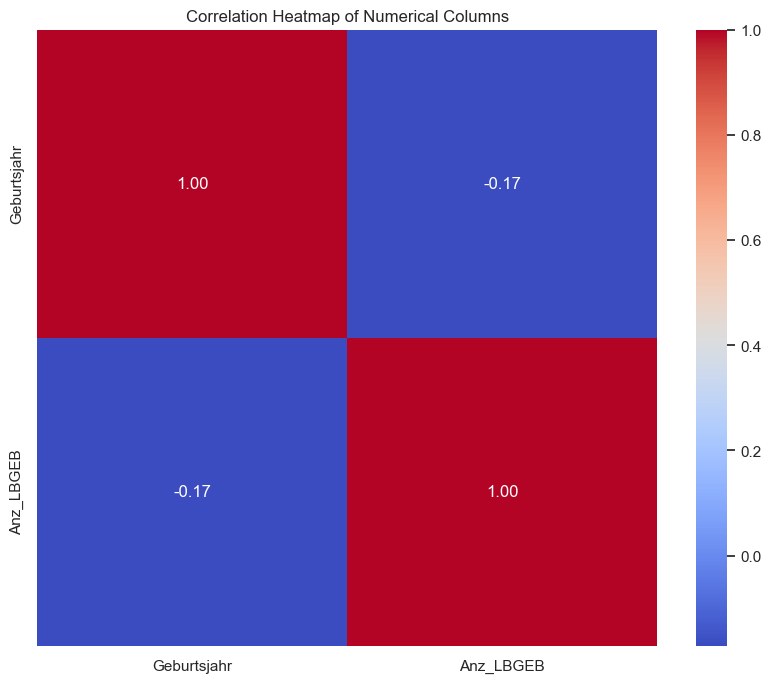

In [71]:
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

In der 8. Visualisierung sehen wir wie die aufteilung von jungs und mädels ist. Was man eigentlich direkt sieht ist das die wieblichen Datensätze in fast jedem Bezirk höher sind. 

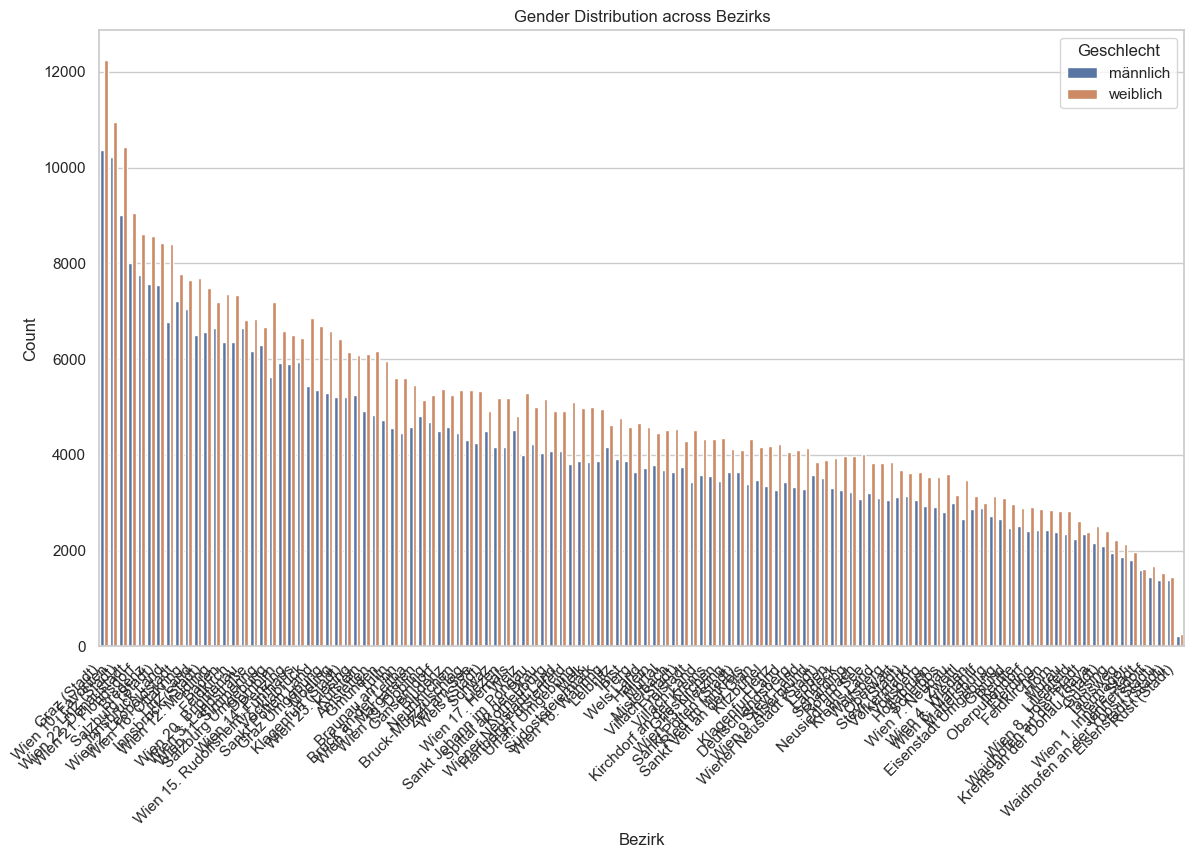

In [72]:
plt.figure(figsize=(14, 8))
sns.countplot(x='Bezirk', hue='Geschlecht', data=df, order=df['Bezirk'].value_counts().index)
plt.title('Gender Distribution across Bezirks')
plt.xlabel('Bezirk')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


Wie zuvor schon erwähnt sehen wir hier in unserer 9. Visualisierung die beliebtesten Jungs Namen. Angeführt wird die Tabelle von dem Namen Alexander. Ein meiner Meinung nach spannender Fakt ist das 7 der top 10 generellen Namen jungs Namen sind obwohl es fast 100 000 weniger männliche Datensätze gibt als weibliche, das bedeutet das die beliebtesten Jungs Namen vielen Jungs gegeben wurde 

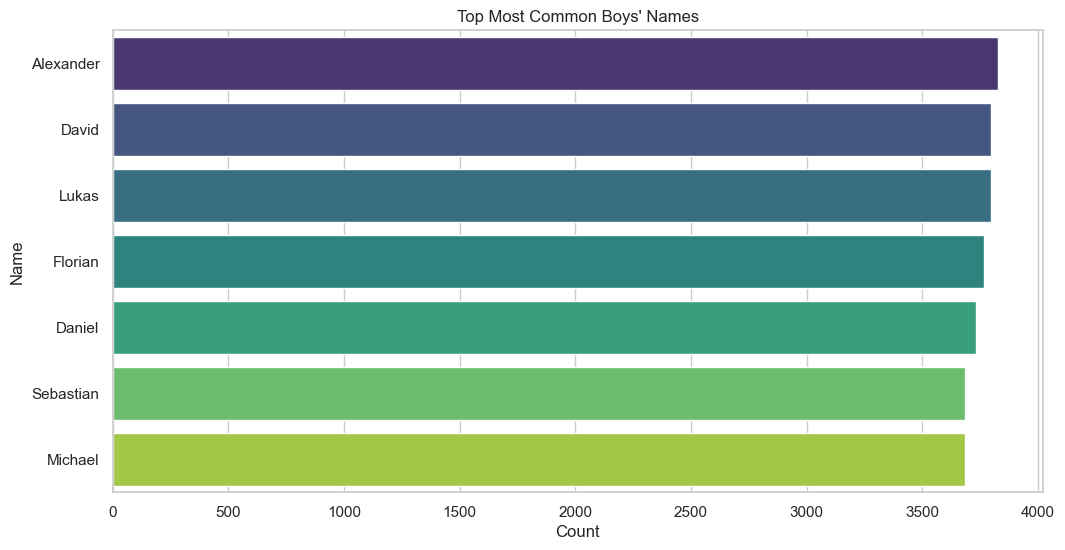

In [73]:
plt.figure(figsize=(12, 6))
top_boys_names = top_names[top_names.index.isin(df[df['Geschlecht'] == 'männlich']['Vorname'])]
sns.barplot(x=top_boys_names.values, y=top_boys_names.index, palette='viridis')
plt.title('Top Most Common Boys\' Names')
plt.xlabel('Count')
plt.ylabel('Name')
plt.show()


Hier in unserer 10. Visualisierung haben wir das Äquivalent zu den beliebtesten Jungs Namen und zwar die beliebtesten Mädels Namen. Angeführt wird die Tabelle mit dem Namen Anna, dicht gefolgt von Julia und Katharina.

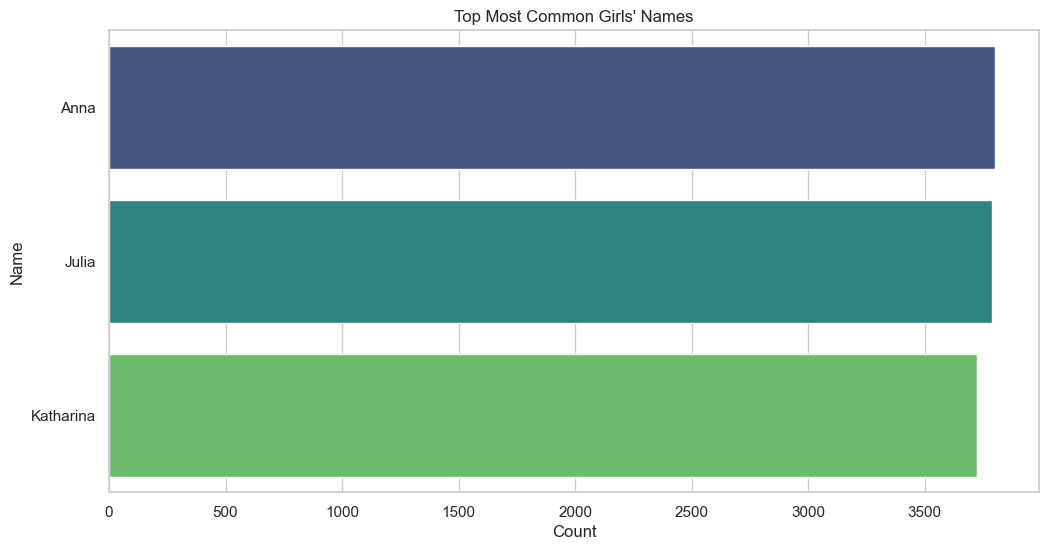

In [74]:
plt.figure(figsize=(12, 6))
top_boys_names = top_names[top_names.index.isin(df[df['Geschlecht'] == 'weiblich']['Vorname'])]
sns.barplot(x=top_boys_names.values, y=top_boys_names.index, palette='viridis')
plt.title('Top Most Common Girls\' Names')
plt.xlabel('Count')
plt.ylabel('Name')
plt.show()

In unserer 11. Visualisierung wird die Verteilung der Jungs und Mädels Geburten behandelt. Was man direkt sieht ist das die Anzahl an jungs steiler nach oben geht als die Anzahl der Mädchen Geburten. 

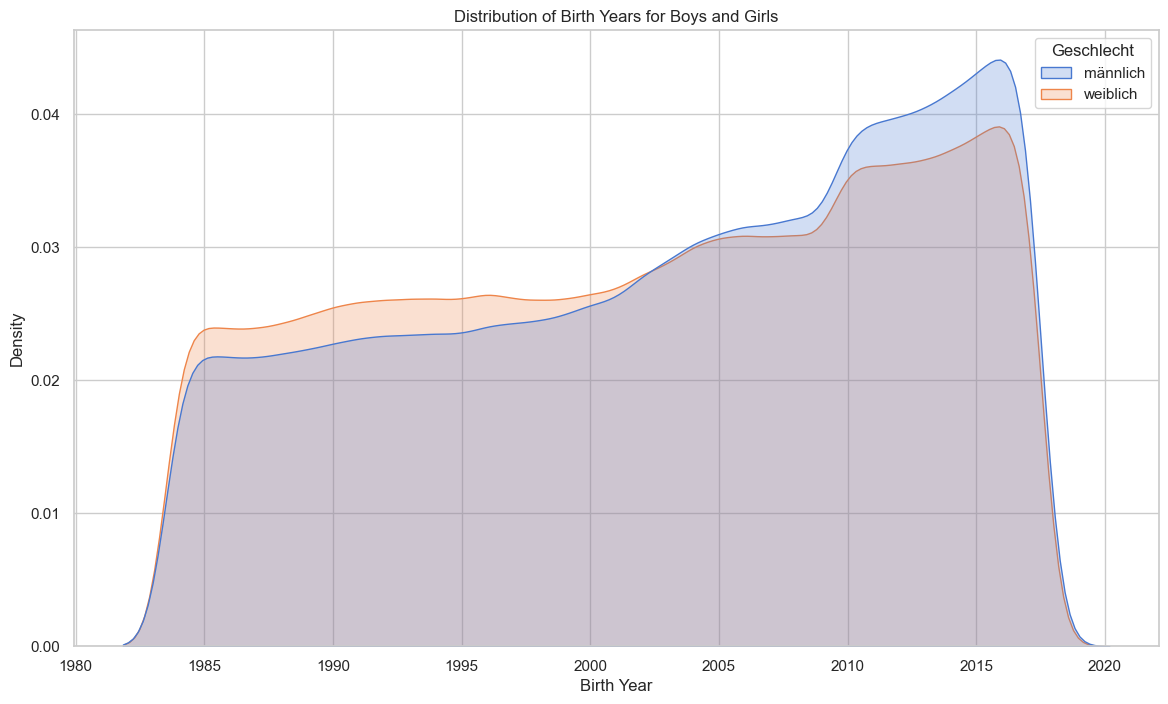

In [75]:
plt.figure(figsize=(14, 8))
sns.kdeplot(data=df, x='Geburtsjahr', hue='Geschlecht', common_norm=False, fill=True, palette='muted')
plt.title('Distribution of Birth Years for Boys and Girls')
plt.xlabel('Birth Year')
plt.ylabel('Density')
plt.show()

In der 12. Visualisierung sehen wir die generelle Anzahl der Geburten pro Jahr. Die Anzahl der Geburten sind eigentlich immer nach oben gegangen außer im Jahr 2009, das ist möglicherweise auf die Wirtschaftskriese zurück zu führen die es in diesem Jahr gab. 

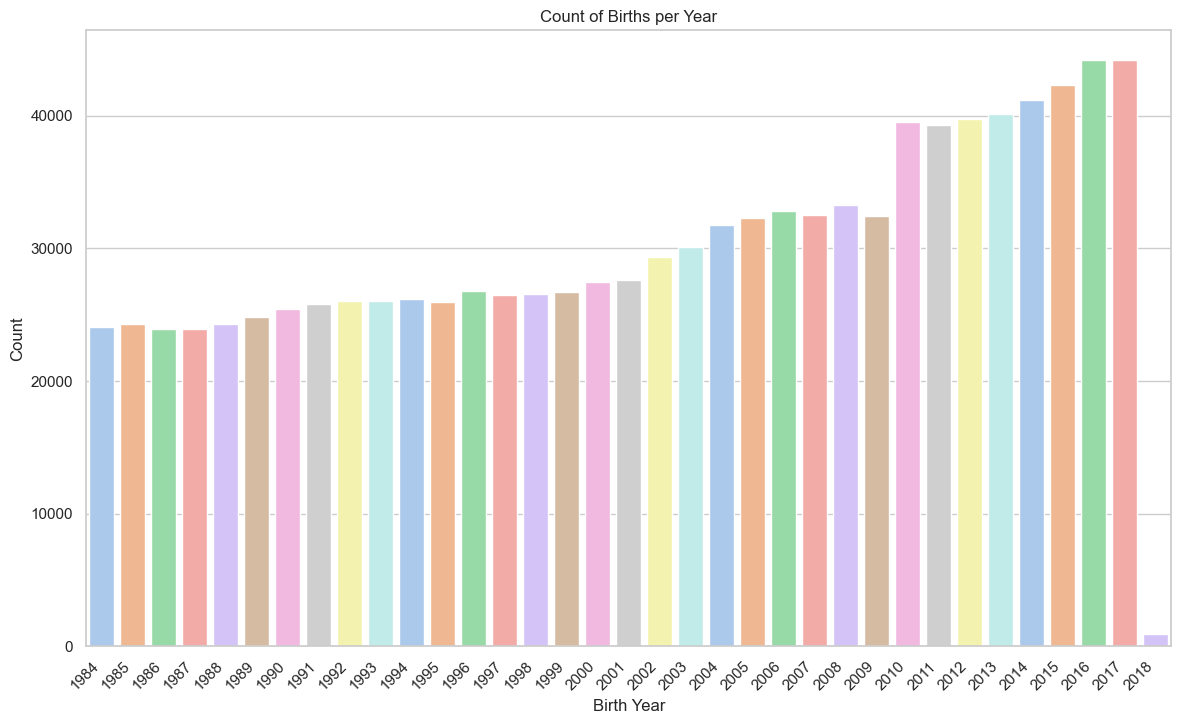

In [76]:
plt.figure(figsize=(14, 8))
sns.countplot(x='Geburtsjahr', data=df, palette='pastel')
plt.title('Count of Births per Year')
plt.xlabel('Birth Year')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


In unserer 13. und letzten Visualisierung sehen wir Boxplots wo man die Geburten pro Jahr und BEzirk sieht.

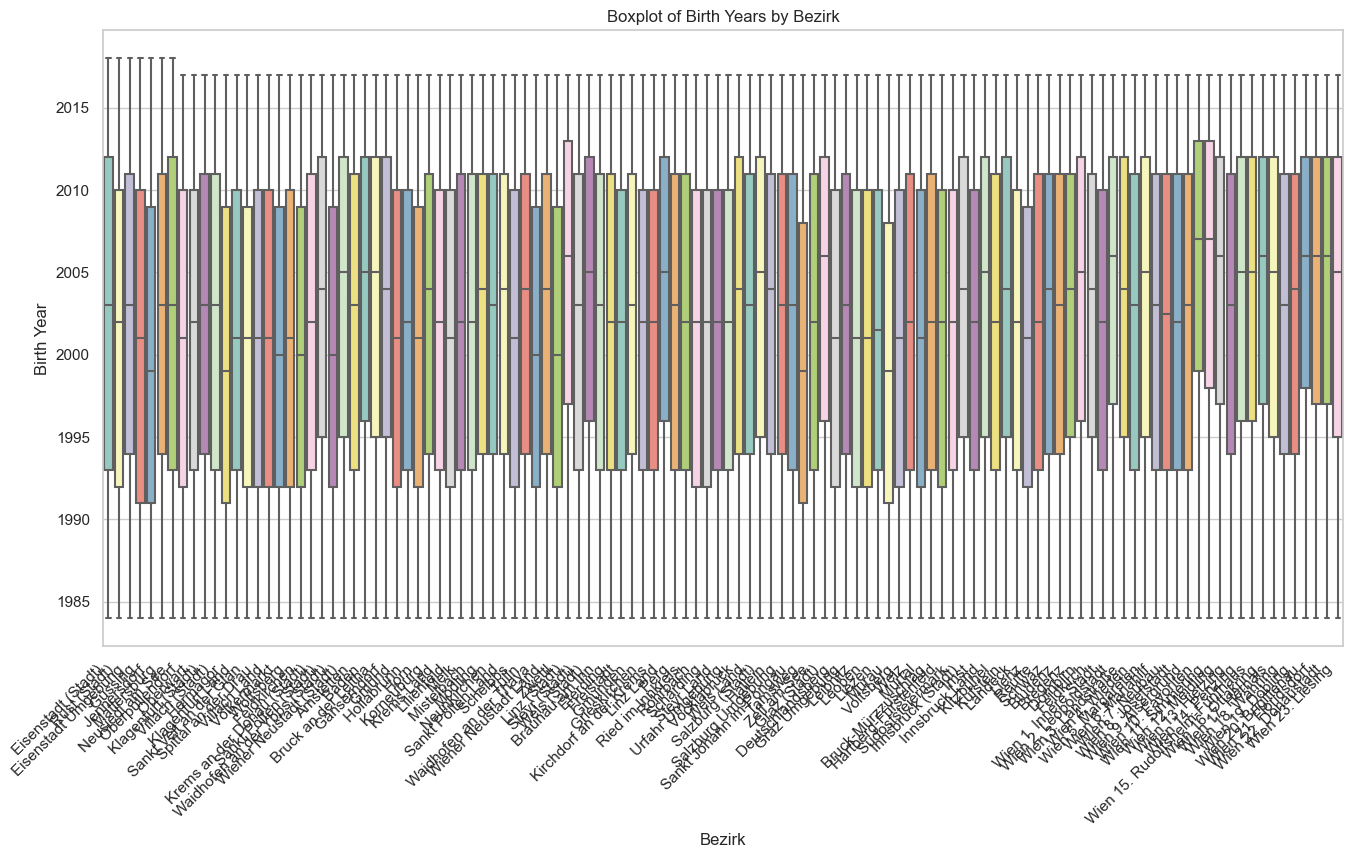

In [78]:
plt.figure(figsize=(16, 8))
sns.boxplot(x='Bezirk', y='Geburtsjahr', data=df, palette='Set3')
plt.title('Boxplot of Birth Years by Bezirk')
plt.xlabel('Bezirk')
plt.ylabel('Birth Year')
plt.xticks(rotation=45, ha='right')
plt.show()